<a href="https://colab.research.google.com/github/sunneysood/deeplearning/blob/master/MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets
import pandas as pd

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
x=breast_cancer.data
y=breast_cancer.target

In [82]:
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

# Loading Dataset

In [83]:
print(x.shape, y.shape)

(569, 30) (569,)


In [0]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [0]:
data['output']=breast_cancer.target

In [86]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [87]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [88]:
data['output'].value_counts()

1    357
0    212
Name: output, dtype: int64

In [89]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [90]:
data.groupby(['output']).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
output,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x=data.drop('output',axis=1)
y=data['output']

In [93]:
type(x)

pandas.core.frame.DataFrame

In [94]:
type(y)

pandas.core.series.Series

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 30)
(57, 30)
(512,)
(57,)


In [97]:
print(y.mean(),y_train.mean(),y_test.mean())

0.6274165202108963 0.6328125 0.5789473684210527


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.mean(),y_train.mean(),y_test.mean())

(512, 30)
(57, 30)
(512,)
(57,)
0.6274165202108963 0.626953125 0.631578947368421


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.mean(),y_train.mean(),y_test.mean())

(512, 30)
(57, 30)
(512,)
(57,)
0.6274165202108963 0.626953125 0.631578947368421


# Binarisation

In [0]:
import matplotlib.pyplot as plt

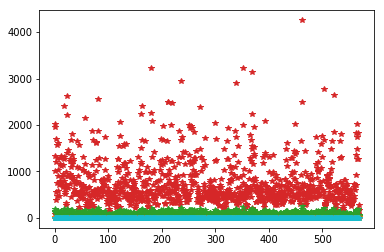

In [101]:
plt.plot(x_train,'*')
plt.show()

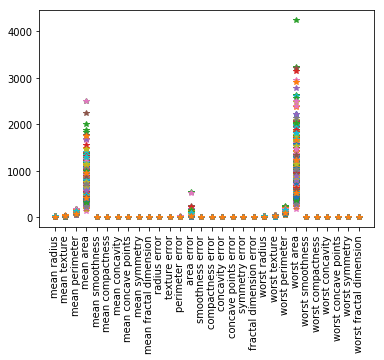

In [102]:
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
x_binary_3_train=x_train['mean area'].map(lambda x: 1 if x >1000 else 0  )

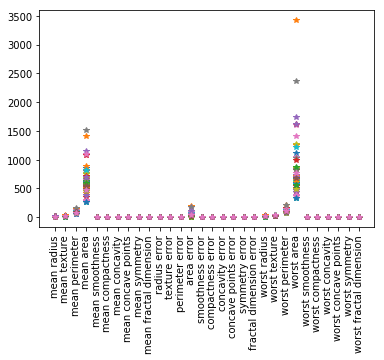

In [104]:
plt.plot(x_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
x_binary_train=x_train.apply(pd.cut,bins=2,labels=[1,0])

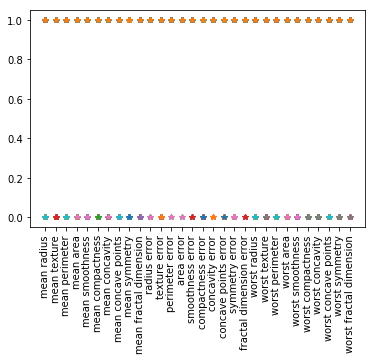

In [106]:
plt.plot(x_binary_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

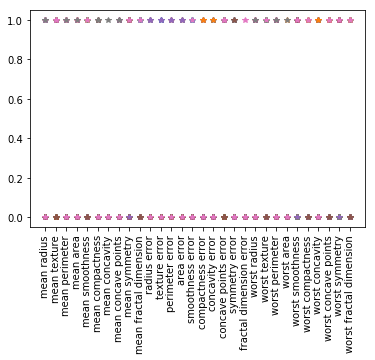

In [107]:
x_binary_test=x_test.apply(pd.cut,bins=2,labels=[0,1])
plt.plot(x_binary_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
x_b_train=x_binary_train.values
x_b_test=x_binary_test.values

In [0]:
import numpy as np

# NP Neuron Model

In [110]:
b=3

i=100

if(np.sum(x_b_train[100,:]) >= b ):
  print("NP Neuron Inference is malignent")
else: 
  print("NP Neuron Inference is benign")
  
if (y_train[i]==1):
  print("Ground truth is malignent")
else:
  print("Ground truth is benign")



NP Neuron Inference is malignent
Ground truth is benign


In [111]:
b=3
y_pred_train=[]
accuracy=0

for x , y in zip(x_b_train,y_train):
  y_pred=(np.sum(x) > b)
  y_pred_train.append(y_pred)
  accuracy += (y==y_pred)
  
print(accuracy, accuracy/x_b_train.shape[0])
  

321 0.626953125


In [112]:
for b in range(x_b_train.shape[1]+1):
  y_pred_train=[]
  accuracy=0

  for x , y in zip(x_b_train,y_train):
    y_pred=(np.sum(x) > b)
    y_pred_train.append(y_pred)
    accuracy += (y==y_pred)

  print(b, accuracy, accuracy/x_b_train.shape[0])
  

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 324 0.6328125
14 325 0.634765625
15 329 0.642578125
16 334 0.65234375
17 338 0.66015625
18 341 0.666015625
19 345 0.673828125
20 355 0.693359375
21 364 0.7109375
22 375 0.732421875
23 396 0.7734375
24 408 0.796875
25 423 0.826171875
26 441 0.861328125
27 444 0.8671875
28 429 0.837890625
29 386 0.75390625
30 191 0.373046875


In [0]:
from sklearn.metrics import accuracy_score

In [114]:
y_pred_test=[]
b=28
for x in zip(x_b_test):
    y_pred=(np.sum(x) > b)
    y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test,y_test)
print(b, accuracy)
  

28 0.3684210526315789


# NP Neuron Class

In [0]:
class NPNeuron:
  def __init__(self):
    self.b=0
    
  def model(self,x):
    return sum(x)>= self.b
  
  def predict(self,x):
    y=[]
    for i in x:
      result= self.model(i)
      y.append(result)
    return np.array(y)
  
  def fit(self,x,y):
    accuracy={}
    for b in range(x.shape[1]+1):
      self.b=b
      y_pred=self.predict(x)
      accuracy[b]=accuracy_score(y_pred,y)
      
    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b
    
    print("Best value of accuracy is for ",best_b)
    print("best accurarcy is ", accuracy[best_b])

In [116]:
npneuron=NPNeuron()

npneuron.fit(x_b_train,y_train)

Best value of accuracy is for  28
best accurarcy is  0.8671875


In [117]:
y_pred=npneuron.predict(x_b_test)
a_test=accuracy_score(y_pred,y_test)
print(a_test)

0.3684210526315789


# Perceptron Model

In [0]:
x_train= x_train.values
x_test=x_test.values

In [0]:
class Perceptron: 
  def __init__(self):
    self.w=None
    self.b=None
    
  def model(self,x):
    return 1 if (np.dot(self.w,x)>= self.b) else 0
    
  def predict(self, x):
    y=[]
    for i in x: 
      result=self.model(i)
      y.append(result)
    return np.array(y)
      
      
  def fit(self,x,y,epochs=2,lr=1):
    self.w=np.ones(x.shape[1])
    self.b=0
    maxaccuracy=0
    accuracy={}
    
    weight_matrix=[]
    
    for e in range(epochs):
      for i,j in zip(x,y):
        y_pred=self.model(i)
        if j==1 and y_pred==0:
          self.w = self.w + lr*i
          self.b = self.b + lr*1
        elif j==0 and y_pred==1:
          self.w=self.w - lr*i
          self.b=self.b - lr*1
      
      weight_matrix.append(self.w)
      accuracy[e] = accuracy_score(self.predict(x),y)
      if accuracy[e]>maxaccuracy:
        maxaccuracy=accuracy[e]
        chkw=self.w
        chkb=self.b
    
    
    self.b=chkb
    self.w=chkw
    
    print(maxaccuracy)
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()
    
    return np.array(weight_matrix)
    

In [0]:
perc = Perceptron()

0.919921875


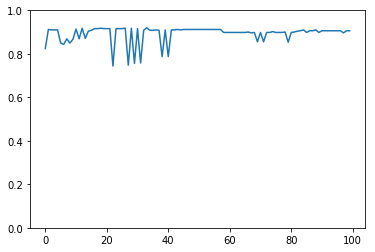

In [206]:
wt_mtx= perc.fit(x_train,y_train,100,0.001)

In [196]:
y_pred_train=perc.predict(x_train)
print(accuracy_score(y_pred_train,y_train))

0.919921875


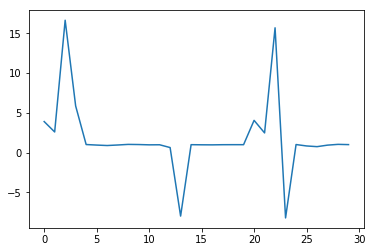

In [197]:
plt.plot(perc.w)
plt.show()

In [198]:
y_pred_test=perc.predict(x_test)
print(accuracy_score(y_pred_test,y_test))

0.9122807017543859


In [0]:
#http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

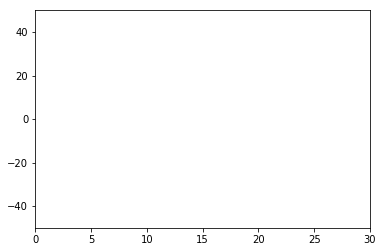

In [220]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_mtx.shape[1]))
ax.set_ylim((-50, 50))

line, = ax.plot([], [], lw=2)

In [215]:
wt_mtx[-1,:]

array([  5.898949  ,   0.32607   ,  24.87031   ,   5.5029    ,
         1.00941743,   0.84047964,   0.71728714,   0.89018937,
         1.0206768 ,   1.01846698,   0.9664833 ,   0.6344156 ,
         0.0661239 , -13.32591   ,   0.99658927,   0.95363453,
         0.93680693,   0.98730322,   0.99227065,   0.99614291,
         6.144196  ,  -2.81788   ,  20.56987   ,  -8.7914    ,
         0.99001519,   0.47668743,   0.29473868,   0.81774917,
         0.9723132 ,   0.98403764])

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_mtx.shape[1]))
    y = wt_mtx[i,:]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=200, blit=True)

In [223]:
HTML(anim.to_html5_video())